# Cat pic classifier

## Import library

In [91]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Get data

### Load h5

In [2]:
f = h5py.File('data/train_catvnoncat.h5', 'r')
list(f.keys())

['list_classes', 'train_set_x', 'train_set_y']

### Get training data set

The training dataset has 209 examples. Each example image represents and RGB image size 64x64.

In [3]:
list_classes = f['list_classes'][()]
train_set_x = f['train_set_x'][()]
train_set_y = f['train_set_y'][()]

In [4]:
list_classes.shape, train_set_x.shape, train_set_y.shape

((2,), (209, 64, 64, 3), (209,))

In [5]:
list_classes[()]

array([b'non-cat', b'cat'], dtype='|S7')

Plotting the occurence of two outputs - non-cat and cat - shows there are twice more non-cats than cats.

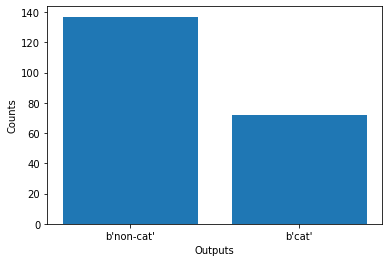

In [6]:
uniques, counts = np.unique(train_set_y[()], return_counts=True)
plt.bar(uniques, counts)
plt.xticks(uniques, list_classes[()])
plt.xlabel("Outputs")
plt.ylabel("Counts")
plt.show()

### Preview some images

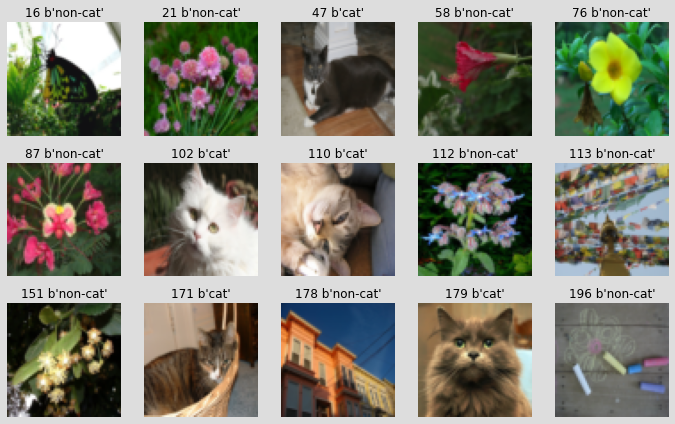

In [7]:
fig=plt.figure(figsize=(10, 6))
columns = 5
rows = 3

np.random.seed(seed=1112)
indexes = np.sort(np.random.choice(len(train_set_x), size=columns*rows, replace=False))

for i in range(1, columns*rows+1):
    index = indexes[i-1]
    img = train_set_x[index]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
    
    subplot_title = "{} {}".format(str(index), str(list_classes[train_set_y[index]]))
    plt.title(subplot_title)
    plt.tight_layout()

fig.set_facecolor('#dddddd')
plt.show()

### Preview one input image 

In [8]:
np.shape(train_set_x[179]), np.max(train_set_x), np.min(train_set_x)


((64, 64, 3), 255, 0)

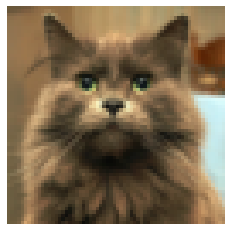

In [9]:
plt.imshow(train_set_x[179])
plt.axis('off')
plt.show()

## Preprocessing data

### Processing training input data

In [10]:
m, h, w, d = np.shape(train_set_x)
n_x = h * w * d
print("train_set_x shape: {}. There are {} training examples. Each training example has {} features"
      .format(np.shape(train_set_x), m, n_x))

train_set_x shape: (209, 64, 64, 3). There are 209 training examples. Each training example has 12288 features


X needs to be reshaped and normalised to be fitting into training model. Initially **train_data_set** has a shape of (209, 64, 64, 3) and needs to be shaped into this format, where each ecample is placed into columns
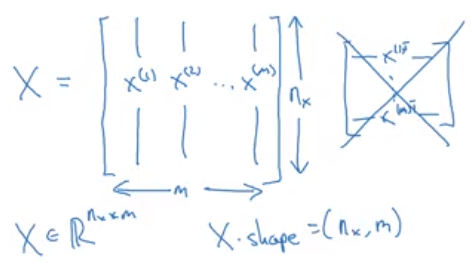
The dataset also needs to be normalised, which can be achieved by dividing it to 255

In [11]:
processed_train_set_x = train_set_x.flatten().reshape(m, n_x).T / 255
processed_train_set_x.shape

(12288, 209)

In [12]:
input_x_shape_error = "processed training set should be {}, but got {}".format((n_x,m),processed_train_set_x.shape)
assert processed_train_set_x.shape == (n_x, m), input_x_shape_error

### Processing training output data

Reshaping the training output into matrix of following property. Note this matrix is 2D, to make matrix multiplication easier, also good practice (suggested by Andrew Ng)
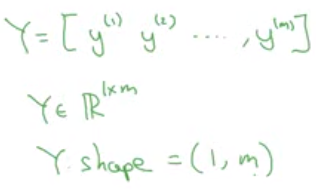

In [55]:
processed_train_set_y = train_set_y.reshape(1, m)
processed_train_set_y.shape

(1, 209)

## Create and the model

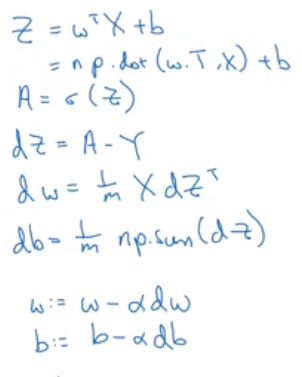

### Initialising weights and bias

In [195]:
np.random.seed(1)
w = np.random.uniform(low=-0.5, high=0.5, size=(n_x, 1))
b = np.random.uniform(low=-0.5, high=0.5)
w.shape, b

((12288, 1), 0.20793428637881872)

### Define sigmoid to be used as activation function

In [196]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### Assemble everything and make initial guesses

Test matrix multiplication

In [197]:
A = sigmoid(np.dot(w.T, processed_train_set_x) + b)
A.shape

(1, 209)

Map probability to choice whether the pic is cat or non-cat

In [198]:
initial_guess = np.where(A < 0.5, 0., 1.)
initial_guess

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
        0.]])

Calculate accuracy of initial guesses

In [199]:
"Accuracy {}%".format(np.round(np.sum(inital_guess == processed_train_set_y) / m * 100, 2))

'Accuracy 68.9%'

It is also noted that initialise any weight and bias, ie. any seeds, or zero w/b, will always yield accuracy of 68.9%, which is roughly the proportion of non-cat pics within the training dataset.

### Cost function

Calculate loss for each training example using formula
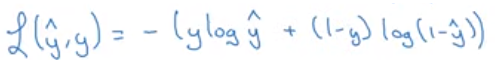

In [200]:
loss_matrix = -(processed_train_set_y * np.log10(A) + (1 - processed_train_set_y) * np.log10(A))

Calculate cost function, by calculating the average loss of all training example

In [201]:
cost = np.sum(loss_matrix)/m
cost

2.2453032726727185

### Calculate gradient of weight and bias

Needed for gradient descent

In [202]:
dz = A - processed_train_set_y
dw = np.dot(processed_train_set_x, dz.T) / m
dw, dw.shape

(array([[-0.02098793],
        [-0.01032658],
        [-0.00856432],
        ...,
        [-0.04413312],
        [-0.04007088],
        [-0.04556723]]),
 (12288, 1))

In [203]:
db = np.sum(dz) / m
db

-0.0730494307314788